In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
rock_character = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '材料')
device_wob = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备wob')
device_T = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备T')
device_wob['time'] = [int(temp) for temp in device_wob['时间/s']]
device_T['time'] = [int(temp) for temp in device_T['时间/s']]
device_S = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备S')
device_Z = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备Z')
del device_wob['时间/s']
del device_T['时间/s']
columns = ['材料2','材料4','材料5','材料7','材料8','材料10','材料11','材料13','材料55','材料21','材料22']
res_df = pd.DataFrame(columns=['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt','S','Z','res'])

for time in range(1050,1406,3):
    device_wob_temp = device_wob[(device_wob['time']>=time) & (device_wob['time']<(time+3))]
    device_T_temp = device_T[(device_T['time']>=time) & (device_T['time']<(time+3))]
    
    device_wob_temp_des = device_wob_temp[columns].describe()
    device_T_temp_des = device_T_temp[columns].describe()
    
    #每三钟算一组，统计特征,取少的这个device_T_mean
    for column in columns:
        wob_min = device_wob_temp_des[column]['min']
        wob_max = device_wob_temp_des[column]['max']
        wob_mean = device_wob_temp_des[column]['mean']
        wob_std = device_wob_temp_des[column]['std']
        wob_skew = device_wob_temp[column].skew()#偏度计算
        wob_kurt = device_wob_temp[column].kurt()#峰度计算        

        T_min = device_T_temp_des[column]['min']
        T_max = device_T_temp_des[column]['max']
        T_mean = device_T_temp_des[column]['mean']
        T_std = device_T_temp_des[column]['std']
        T_skew = device_T_temp[column].skew()#偏度计算
        T_kurt = device_T_temp[column].kurt()#峰度计算  


        S = device_S[column].values[0]
        Z = device_Z[column].values[0]
        res = column
        row = {'wob_min':wob_min,'wob_max':wob_max,'wob_mean':wob_mean,'wob_std':wob_std,'wob_skew':wob_skew,'wob_kurt':wob_kurt,'T_min':T_min,'T_max':T_max,'T_mean':T_mean,'T_std':T_std,'T_skew':T_skew,'T_kurt':T_kurt,'S':S,'Z':Z,'res':res}
        res_df.loc[len(res_df)] = row

res = pd.merge(left=res_df,right = rock_character, left_on = 'res', right_on ='岩性名称')
# 显示所有列
pd.set_option('display.max_columns', None)
res = res.drop(['序号', '岩性名称', '粒径', '拉强比', '脆性指数'], axis=1)
res.head(n=10)

wob_min  wob_max  wob_mean   wob_std  wob_skew  wob_kurt  T_min   T_max  \
0  3.00286  3.65089  3.413814  0.236150 -1.001939 -0.280232  7.998  11.970   
1  2.94301  3.68661  3.445723  0.233032 -1.300229  1.825893  7.729  11.722   
2  3.13777  3.58919  3.452857  0.162115 -0.970448 -0.402823  7.371  11.553   
3  3.12568  3.66841  3.462618  0.197012 -0.965071 -0.315246  7.635  11.316   
4  3.09211  3.70193  3.497716  0.172160 -1.359834  3.232517  7.677  11.896   
5  3.08004  3.70812  3.386474  0.185854 -0.200894  0.630906  7.814  11.970   
6  3.04238  3.75137  3.461536  0.196606 -0.667626  1.681516  8.141  11.822   
7  3.03917  3.79027  3.482330  0.211688 -0.872401  1.943167  8.035  11.601   
8  2.89840  3.75573  3.388337  0.271653 -0.691519 -0.109878  8.325  11.938   
9  2.98792  3.81703  3.469089  0.291996 -0.227357 -1.116429  7.677  11.179   

      T_mean     T_std    T_skew    T_kurt      S    Z  res    设备S  设备Z  \
0  10.143500  1.191906 -0.029635 -0.159510  101.4  2.4  材料2  101.4  2.4   
1   9.896000  1.476044 -0.212896 -1.272081  101.4  2.4  材料2  101.4  2.4   
2   9.998000  1.337848 -0.663097 -0.087198  101.4  2.4  材料2  101.4  2.4   
3   9.723333  1.133635 -0.272630  0.348469  101.4  2.4  材料2  101.4  2.4   
4   9.825100  1.427393 -0.221311 -1.061463  101.4  2.4  材料2  101.4  2.4   
5   9.915000  1.485106  0.265430 -1.271927  101.4  2.4  材料2  101.4  2.4   
6   9.702000  1.233535  0.315310 -1.174216  101.4  2.4  材料2  101.4  2.4   
7   9.445444  1.268357  0.692701 -0.957530  101.4  2.4  材料2  101.4  2.4   
8   9.625500  1.370101  0.831022 -1.068247  101.4  2.4  材料2  101.4  2.4   
9   9.774333  1.163278 -0.742342 -0.561894  101.4  2.4  材料2  101.4  2.4   

   静态抗压强度   弹性模量   泊松比  抗拉强度    黏聚力   内摩擦角  回弹均值   动态强度  滑动摩擦系数     声级    波速  \
0  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
1  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
2  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
3  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
4  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
5  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
6  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
7  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
8  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
9  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   

   密度均值      渗透率   孔隙度   标定温度  
0  2.86  0.00176  2.08  60.21  
1  2.86  0.00176  2.08  60.21  
2  2.86  0.00176  2.08  60.21  
3  2.86  0.00176  2.08  60.21  
4  2.86  0.00176  2.08  60.21  
5  2.86  0.00176  2.08  60.21  
6  2.86  0.00176  2.08  60.21  
7  2.86  0.00176  2.08  60.21  
8  2.86  0.00176  2.08  60.21  
9  2.86  0.00176  2.08  60.21

In [ ]:
#结合遗传算法优化
import random
import numpy as np
from deap import base, creator, tools
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kuet','T_min','T_max','T_mean','T_std','T_skew','T_kuet']
X = res[xx]
## Y为要预测的数值
y = res["静态抗压强度"]

# 初始化creator
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 设置如下参数范围
param_bounds = {
    'max_depth': (3, 10),  # 对于需要整数的参数，我们将使用randint
    'learning_rate': (0.01, 0.3),
    'subsample': (0.05, 1.0),
    'colsample_bytree': (0.05, 1.0),
}

# 初始化toolbox
toolbox = base.Toolbox()

# 注册属性生成器
toolbox.register("attr_max_depth", random.randint, *param_bounds['max_depth'])  # 整数生成器
for key, bound in filter(lambda item: item[0] != 'max_depth', param_bounds.items()):
    min_value, max_value = bound
    toolbox.register(f"attr_{key}", random.uniform, min_value, max_value)

# 创建个体生成器
toolbox.register("individual", tools.initCycle, creator.Individual,
                 [(toolbox.attr_max_depth if key == 'max_depth' else getattr(toolbox, f"attr_{key}"))
                  for key in param_bounds.keys()],
                 n=1)

# 创建种群生成器
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 注册适应度函数
def eval_fitness(individual):
    params = dict(zip(param_bounds.keys(), individual))
    
    params['max_depth'] = int(params['max_depth'])
    params['learning_rate'] = params['learning_rate'] if (0 < params['learning_rate'] < 1) else random.uniform(0.1,0.3)
    params['subsample'] = params['subsample'] if (0< params['subsample']< 1) else random.uniform(0,1)
    params['colsample_bytree'] = params['colsample_bytree'] if (0< params['colsample_bytree']< 1) else random.uniform(0,1)
    
    print(params)
    # 使用新的参数训练模型
    model = XGBRegressor(**params)
    
    # 训练集和测试集划分保持不变
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
    dtrain = xgb.DMatrix(Xtrain, ytrain, feature_names=feature_name)
    dtest = xgb.DMatrix(Xtest, feature_names=feature_name)
    
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)

    # 使用R²分数作为适应度函数
    fitness = r2_score(ytest, predictions)
    
    return fitness,

toolbox.register("evaluate", eval_fitness)

# 注册选择、交叉和变异算子
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)

# 设置遗传算法参数
POPULATION_SIZE = 50
MAX_GENERATIONS = 50
CXPB = 0.7
MUTPB = 0.2

# 运行遗传算法
pop = toolbox.population(n=POPULATION_SIZE)

for g in range(MAX_GENERATIONS):
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

# 找到最优个体及其对应的参数
best_individual = tools.selBest(pop, 1)[0]
best_params = dict(zip(param_bounds.keys(), best_individual))

# 输出最佳参数和对应的R²分数
print(f"Best Parameters: {best_params}")
print(f"Best Fitness (R² Score): {best_individual.fitness.values[0]}")

The training time = 0.2098071575164795
The R2_score = 0.9854697686786251
The rmse of prediction is: 1.2041298400402256


The training time = 0.22912001609802246
The R2_score = 0.9785258046016311
The rmse of prediction is: 0.09305577700471973


The training time = 0.21349596977233887
The R2_score = 0.9914675998554687
The rmse of prediction is: 4.480399895689404


The training time = 0.21253585815429688
The R2_score = 0.986938489840442
The rmse of prediction is: 1.9247029614705737


The training time = 0.20126986503601074
The R2_score = 0.9603036741209026
The rmse of prediction is: 0.007062909253602528


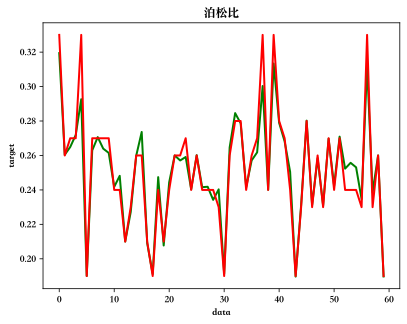

The training time = 0.2452869415283203
The R2_score = 0.9483990790233779
The rmse of prediction is: 0.6481287117572757


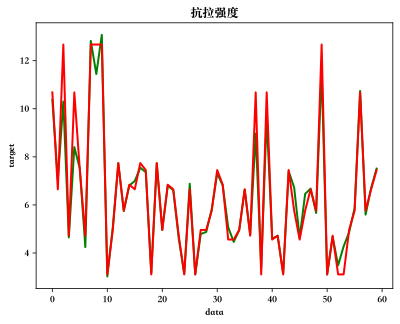

The training time = 0.2659320831298828
The R2_score = 0.9487384598263982
The rmse of prediction is: 0.8894171195366803


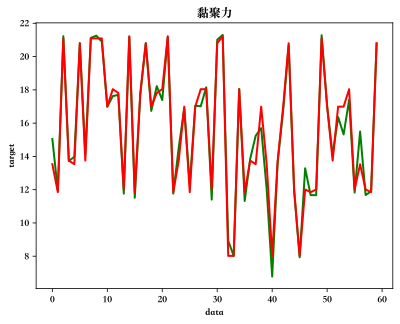

The training time = 0.20023083686828613
The R2_score = 0.939428085883194
The rmse of prediction is: 1.1458082046991553


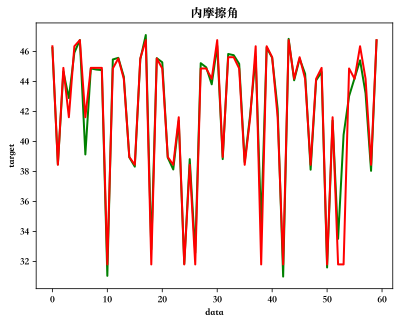

The training time = 0.20107293128967285
The R2_score = 0.9822106110967135
The rmse of prediction is: 1.728471382493522


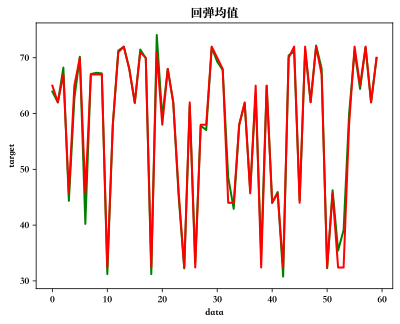

The training time = 0.20217204093933105
The R2_score = 0.9743588787486419
The rmse of prediction is: 9.901717323954246


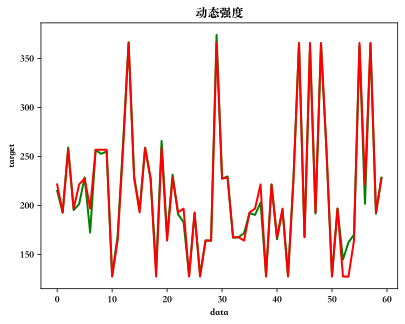

The training time = 0.1905500888824463
The R2_score = 0.971964855546929
The rmse of prediction is: 0.006473270862666653


The training time = 0.18128204345703125
The R2_score = 0.9796349134644446
The rmse of prediction is: 0.6545123746048848


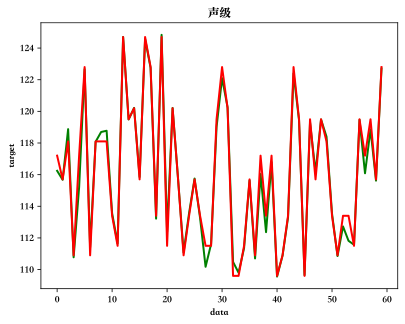

The training time = 0.20682811737060547
The R2_score = 0.9833468773615205
The rmse of prediction is: 0.15487230331222054


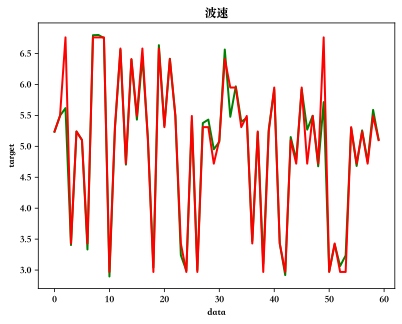

The training time = 0.20824813842773438
The R2_score = 0.9816215374236995
The rmse of prediction is: 0.0740529130474576


The training time = 0.18859386444091797
The R2_score = 0.9714292019045807
The rmse of prediction is: 0.009342567946184984


The training time = 0.2101588249206543
The R2_score = 0.9778645690346834
The rmse of prediction is: 0.9247147212671215


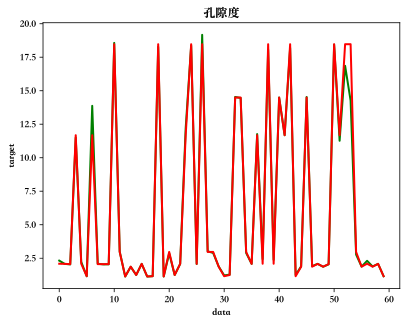

The training time = 0.18768525123596191
The R2_score = 0.9896800703217197
The rmse of prediction is: 0.42167166068721645


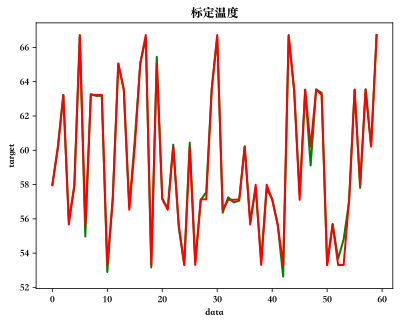

In [8]:
columns = ['设备S','设备Z','静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '回弹均值', '动态强度', '滑动摩擦系数', '声级', '波速', '密度均值', '渗透率', '孔隙度', '标定温度']

import xgboost as xgb
from xgboost import plot_importance,plot_tree
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']
X = res[xx]

for pred_y in columns:
    ## Y为要预测的数值
    y = res[pred_y]
    feature_name =X.columns
    #将数据分割训练数据与测试数据
    #print(np.isnan(X).any())
    from sklearn.model_selection import train_test_split
    # 随机采样20%的数据构建测试样本，其余作为训练样本
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

    dtrain = xgb.DMatrix(Xtrain, ytrain,feature_names=feature_name)
    dtest = xgb.DMatrix(Xtest,feature_names=feature_name)
    #{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
    params = {'booster':'gbtree',
              'objective':'reg:squarederror',
              'eta':0.1,
              'gamma':0,
           #  'alpha':0,
           #  'lambda':3,
              'max_depth':7,
              'subsample':0.6849912226732566,
              'colsample_bytree':0.9269737580495006,
              'min_child_weight':1,
              'learning_rate':0.1970728149783871,
            #  'seed':1000,
              'nthread':1
              }
    num_round = 50

    start_time = time.time()
    bst = xgb.train(params, dtrain, num_round)
    end_time = time.time()
    print('The training time = {}'.format(end_time - start_time))

    # 保存模型
    bst.save_model("model_"+pred_y+".xgb")  # 将模型保存为model.xgb文件

    # 加载已保存的模型
    loaded_bst = xgb.Booster()
    loaded_bst.load_model("model_"+pred_y+".xgb")  # 从model.xgb文件加载模型

    # 使用加载后的模型进行预测
    bst_ypred = loaded_bst.predict(dtest)
    r2score = r2_score(ytest, bst_ypred)
    bst_rmse = mean_squared_error(ytest, bst_ypred) ** 0.5

    print('The R2_score = {}'.format(r2score))
    print('The rmse of prediction is:', bst_rmse)
    #plot_importance(bst,importance_type="weight")
    plt.figure()
    plt.plot(range(60), bst_ypred[:60], c="g", label="ypred", linewidth=2)
    plt.plot(range(60), ytest[:60], c="r", label="ytest", linewidth=2)
    #数据保存
    temp_csv = pd.DataFrame(columns=['ytest','ypred'])
    temp_csv['ytest'] = ytest[:60]
    temp_csv['ypred'] = bst_ypred[:60]
    temp_csv.to_csv(pred_y+'.csv',index=None,encoding='utf-8-sig')
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(pred_y)
    plt.show()